# ADMIXTURE

## General Settings

In [4]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

% run general_settings.py
# ^ Takes ~20s to run if it finds the dumpfiles
# ^ WARNING: It will hog ~2.02 Gb RAM

% run datasets_settings.py
# ^ Will take another ~20s

! echo; wc -l /home/juan/tesina/dataset_dumps/*.samples

/home/juan/anaconda3/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
/home/juan/repos/tesina/panels/genome.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  centromers["chromosome"] = [i.replace("CEN", "") for i in centromers.index]


[17:04:24] 'panels' dict
[17:04:24] 'galanter', 'present', 'missing' dataframes
[17:04:24] 'panel_labels'
[17:04:24] 'panel_names' dict
[17:04:24] 'panel_rsIDs' dict
[17:04:24] 'genome' dataframe
[17:04:30] 'lat' dataframe
[17:04:44] 'control_genotypes' huge datagrame
[17:04:44] 'control_rsIDs' dict to filter it ^
[17:04:44] 'cp_factors' list
[17:04:44] 'control_labels'
[17:04:44] 'control_names' dict
[17:04:44] 'df_1000G_samples'
[17:04:44] 'df_1000G_SNPs'
[17:04:44] 'df_1000G_genotypes'
[17:04:44] 'df_1000G_populations'
[17:04:44] 'df_1000G_genotypes_alleles'
[17:04:45] 'mafs' dataframe
[17:04:45] 'dataset_names'
[17:04:45] 'dataset_populations'
[17:04:45] 'dataset_samples' created and written to files
[17:04:55] 'ancestries_df' read from ADMIXTURE results

  346 /home/juan/tesina/dataset_dumps/L.samples
  544 /home/juan/tesina/dataset_dumps/LE.samples
  751 /home/juan/tesina/dataset_dumps/LEA.samples
  959 /home/juan/tesina/dataset_dumps/LEAC.samples
 1062 /home/juan/tesina/dataset_

/home/juan/anaconda3/lib/python3.5/site-packages/pandas/io/parsers.py:1588: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/juan/anaconda3/lib/python3.5/site-packages/pandas/io/parsers.py:1590: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


* En `./dataset_dumps/` están los archivos `.samples` con los sample IDs de 1000 Genomas para cada dataset (`L`, `LE`, `LEA` ...). En `../1000Genomes/galanter_beds` están los archivos (`.bed`, `.bim` ...) de PLINK de cada panel (GALs y CPs).
* Copié tanto los `.samples` como los bedfiles a `~/tesina/admixture` (con `./0_bring_the_panel_bedfiles.sh`) y corrí `1_create_datasets_run_admixture.sh panel_label_1 panel_label_2 ..`. Se crean automáticamente directorios por cada combineta de dataset + panel con los archivos `.P` y `.Q`
* Finalmente corrí `2_generate_CV_errors`.

## CV Errors

### Plot the CV errors per dataset / per panel

In [1]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from plotters.admixture_cv_errors import AdmixtureCVErrors


sns.set_context("notebook")
sns.set_style("white")

admixture_cv_errors = AdmixtureCVErrors()
cv_errors = admixture_cv_errors.read_cv_errors()

idx = pd.IndexSlice
gal_panels_cv_error = cv_errors.loc[idx[:, ["GAL_Completo", "GAL_Affy", "GAL_Faltantes"]], :]
cp_panels_cv_error = cv_errors.loc[idx[:, ["CPx1", "CPx10", "CPx100"]], :]

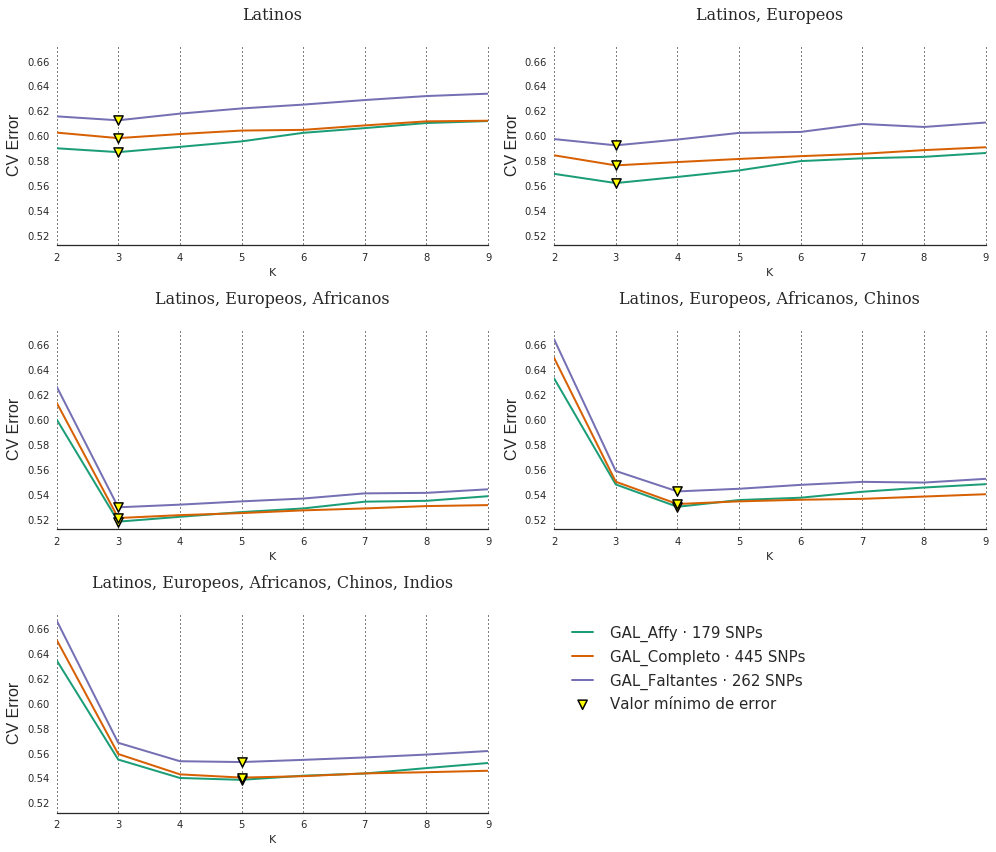

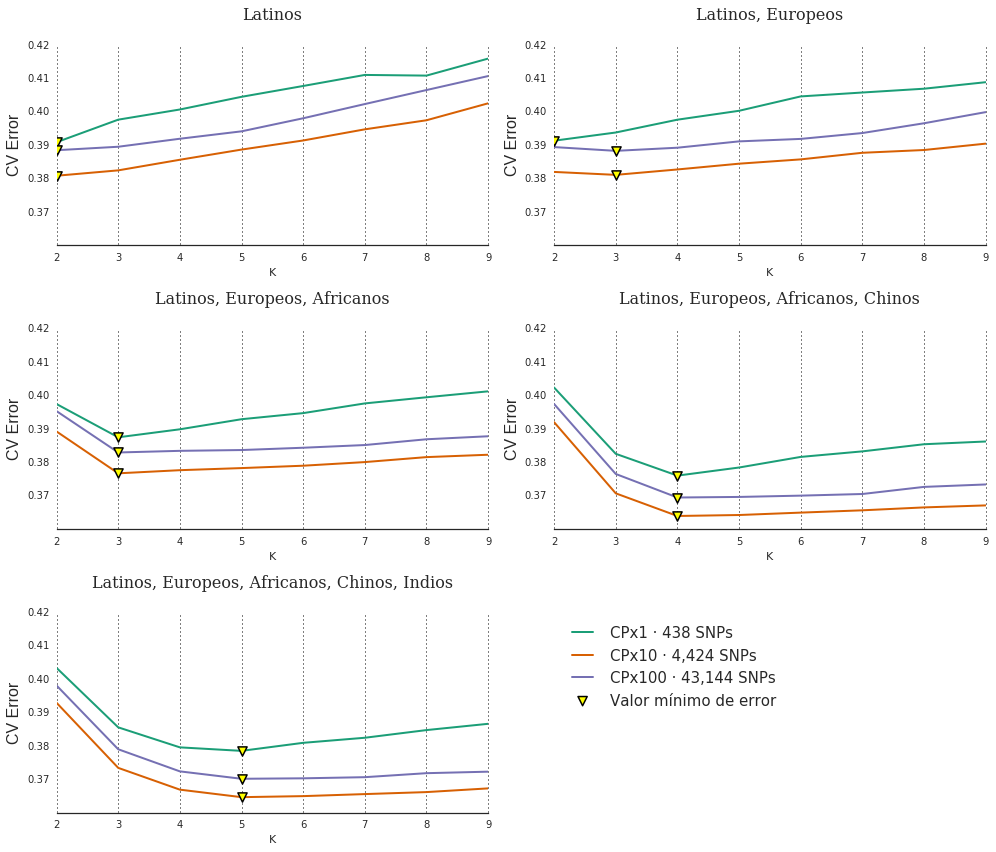

In [126]:
labels = ["CV_errors_GAL", "CV_errors_CPx"]
panel_groups = [gal_panels_cv_error, cp_panels_cv_error]

for filename, panel_group in zip(labels, panel_groups):
    ax = admixture_cv_errors.plot(filename, panel_group)
    plt.show()

## Ancestry ratios per population (mean) and per individual sample

In [12]:
# # 3m 4s to run #plot_all

# import seaborn as sns
# from plotters.admixture_ancestries import AdmixtureAncestries

# sns.set_context("talk")
# sns.set_style("white")

# admix_plotter = AdmixtureAncestries()

# # # debug or show as example
# # K, p, d = 5, "CPx100", "LEACI"
# # admix_plotter.plot_per_sample(d, K, p, ancestries_df)
# # admix_plotter.plot_population_means(d, K, p, ancestries_df)

# # Rerun this line in case you wanna replot population ancestries means:
# admix_plotter.plot_all(ancestries_df)

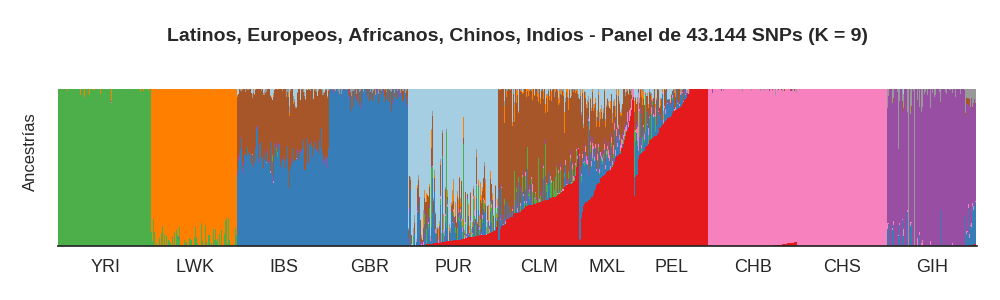

In [3]:
from IPython.display import Image
from os.path import join

panel, dataset, K = "CPx100", "LEACI", 9
filedir = "/home/juan/tesina/charts/ADMIXTURE/"
filename = "{0}__{1}/{1}__{0}__{2}".format(panel, dataset, K)

Image(join(filedir, filename + "__samples.png"))

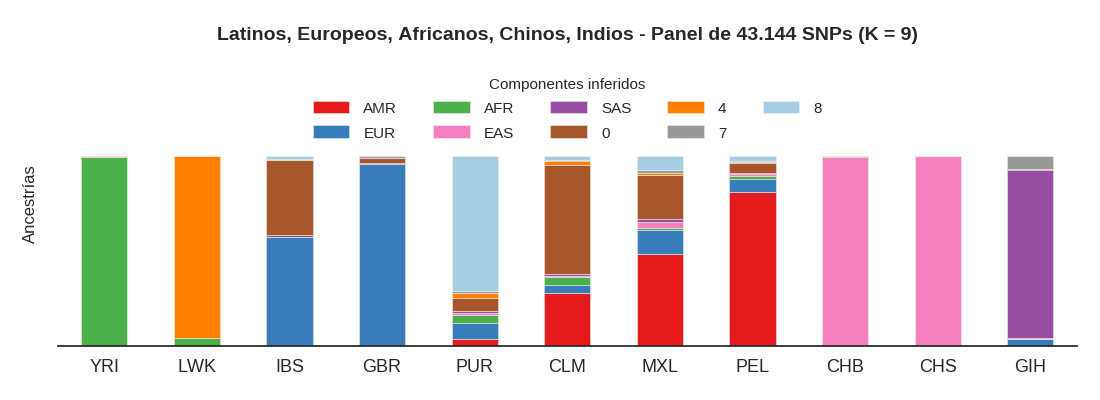

In [1]:
Image(join(filedir, filename + "__means.png"))

# Ternary plots

/home/juan/repos/tesina/plotters/ternary_ancestries.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


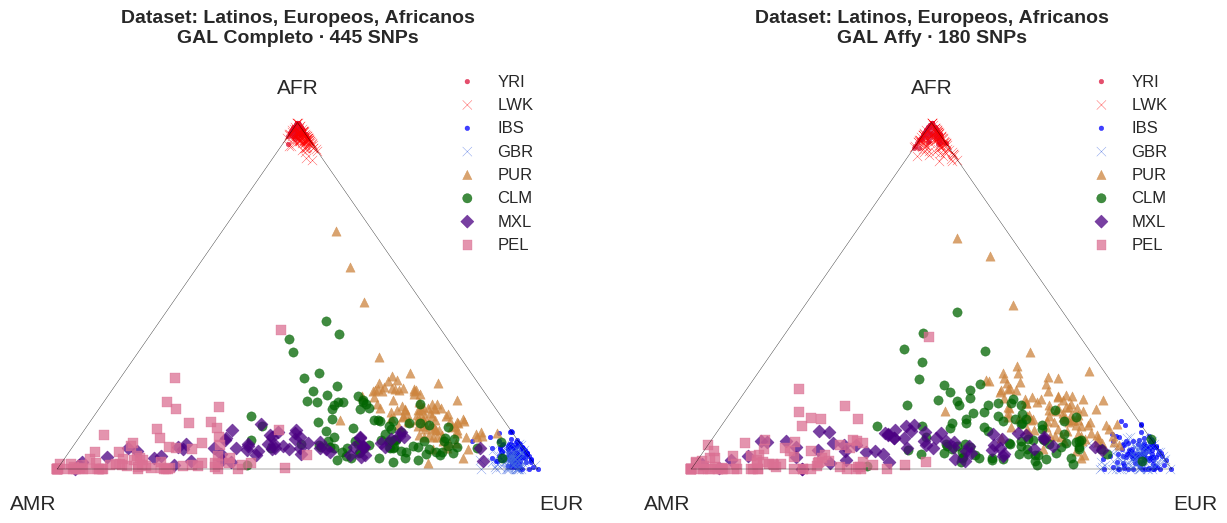

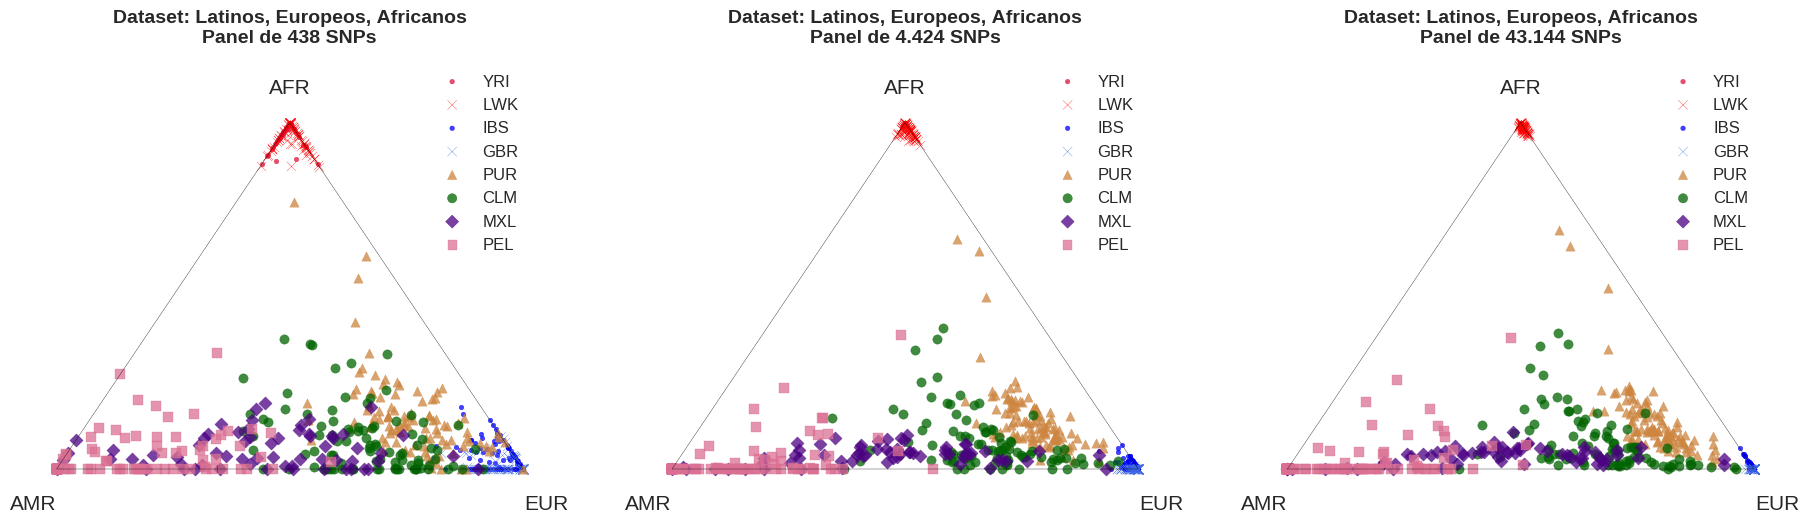

In [80]:
from plotters.ternary_ancestries import TernaryAncestries

TernaryAncestries().plot_all(ancestries_df)

# Ancestry plots like Montinaro 2015
Al final decidí que no se veían interesantes

In [26]:
from admixture.results import AdmixtureResults


admix = AdmixtureResults()
mean_ancestries = admix.mean_ancestries_by_population(ancestries_df)
mean_ancestries.head()

0  AFR   2       AMR       EUR   1  SAS   4  EAS  \
dataset K panel population                                                      
L       2 CPx1  CLM        NaN  NaN NaN  0.249149  0.750851 NaN  NaN NaN  NaN   
                MXL        NaN  NaN NaN  0.496718  0.503282 NaN  NaN NaN  NaN   
                PEL        NaN  NaN NaN  0.800390  0.199610 NaN  NaN NaN  NaN   
                PUR        NaN  NaN NaN  0.100972  0.899028 NaN  NaN NaN  NaN   
          CPx10 CLM        NaN  NaN NaN  0.228942  0.771058 NaN  NaN NaN  NaN   

                             7   8   3   5   6  
dataset K panel population                      
L       2 CPx1  CLM        NaN NaN NaN NaN NaN  
                MXL        NaN NaN NaN NaN NaN  
                PEL        NaN NaN NaN NaN NaN  
                PUR        NaN NaN NaN NaN NaN  
          CPx10 CLM        NaN NaN NaN NaN NaN